In [1]:
import numpy as np
import ase.io
from matplotlib.backends.backend_pdf import PdfPages
from ase.data import covalent_radii as radii
from ase.data.colors import jmol_colors
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [13]:
def sort_collect_trajs(trajs, ref_atoms, repeat=(3, 3, 1)):
    """Given the path to nine trajectories, with all coverages for 3 by 3
    cell, makes a handy PDF showing the configurations.
    Reference atoms are in the order of top layer first, top layer second,
    and top layer fourth."""
    sorted_atoms = []
    for fobj in trajs:
        traj = ase.io.Trajectory(fobj)
        atoms = traj[-1]

        # Move so tops of atoms are all in cell.        
        atoms.translate((atoms[ref_atoms[1]].position 
                         - atoms[ref_atoms[0]].position)/2.)
        atoms.translate((atoms[ref_atoms[2]].position
                         - atoms[ref_atoms[0]].position)/2.)
        # Move all into unit cell.
        atoms.set_positions(atoms.get_positions(wrap=True),
                            apply_constraint=False)
        # Repeat.
        cell = atoms.get_cell()
        atoms.set_constraint([])
        atoms = atoms.repeat(repeat)
        atoms.positions -= cell[0] * (repeat[0] - 1.) / 2.
        atoms.positions -= cell[1] * (repeat[1] - 1.) / 2.
        atoms.set_cell(cell)
        
        # First sort to plot from bottom to top.
        zindices = np.array([atom.z for atom in atoms]).argsort()
        z_sorted = atoms[zindices]
        sorted_atoms.append(z_sorted)
    return sorted_atoms

In [14]:
path = ('../dft-data/Ni111/raw/')

trajs = []
for i in range(9):
    traj = path + "o/ml{}9/final.traj".format(i+1)
    trajs.append(traj)
    
o111_atoms = (sort_collect_trajs(trajs[:-1], ref_atoms=(0, 1, 3))
            + sort_collect_trajs(trajs[-1:], ref_atoms=(0, 18, 6)))
len(o111_atoms)

9

In [15]:
path = ('../dft-data/Ni100/raw/')

trajs = []
for i in range(9):
    if i != 5:        
        traj = path + "o/ml{}9/final.traj".format(i+1)
        trajs.append(traj)
    else:
        traj = path + "o/ml{}9/final.traj".format(1)
        trajs.append(traj)
    
o100_atoms = (sort_collect_trajs(trajs[:-1], ref_atoms=(0, 1, 3))
            + sort_collect_trajs(trajs[-1:], ref_atoms=(0, 18, 6)))
len(o100_atoms)

9

In [16]:
path = ('../dft-data/Ni110/raw/')

trajs = []
for i in range(9):
    traj = path + "o/ml{}9/final.traj".format(i+1)
    trajs.append(traj)
    
o110_atoms = (sort_collect_trajs(trajs[:-1], ref_atoms=(0, 1, 3))
            + sort_collect_trajs(trajs[-1:], ref_atoms=(0, 18, 6)))
len(o110_atoms)

9

In [17]:
path = ('../dft-data/Ni211/raw/')

trajs = []
for i in range(6):
    traj = path + "o/ml{}6/final.traj".format(i+1)
    trajs.append(traj)
    
o211_atoms = (sort_collect_trajs(trajs[:-1], ref_atoms=(0, 1, 3))
            + sort_collect_trajs(trajs[-1:], ref_atoms=(0, 18, 6)))
len(o211_atoms)

6

In [18]:
# path_Co = ('/Users/bjkreitz/Documents/Publikationen/Covdep_Thermo/jongyoon_covdepthermo_thermo_jp/results_Co/')

# trajs = []
# for i in range(9):
#     traj = path_Co + "mh/mh_{}co.traj".format(i+1)
#     trajs.append(traj)
    
# gm_atoms_Co = (sort_collect_trajs(trajs[:-1], ref_atoms=(0, 1, 3))
#             + sort_collect_trajs(trajs[-1:], ref_atoms=(0, 18, 6)))
# len(gm_atoms_Co)

In [19]:
all_atoms=[]
for i in range(len(o111_atoms)):
    #all_atoms.append(atop_atoms[i])
    #all_atoms.append(fcc_atoms[i])
    all_atoms.append(o111_atoms[i])
    all_atoms.append(o100_atoms[i])
    all_atoms.append(o110_atoms[i])
    if i <= 5:
        all_atoms.append(o211_atoms[i])
    else:
        all_atoms.append(o211_atoms[0])

In [24]:
def plot_sorted_trajs(sorted_atoms, img_name):
    figsize = (16, 24)
    gs_column = 4
    gs_row = 9
    n_pane = gs_column * gs_row
    
    #fig = pyplot.figure(dpi=300
    #axs = fig.add_gridspec(9, 4, wspace=0.0, hspace=0.05)

    ax = []
    fig, axs = plt.subplots(nrows=9, ncols=4, figsize=figsize)

    axs[5,1].set_visible(False) # to remove last plot 
    axs[-3,-1].set_visible(False) # to remove last plot 
    axs[-2,-1].set_visible(False) # to remove last plot 
    axs[-1,-1].set_visible(False) # to remove last plot     
    
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, row in enumerate(axs):
        for j, a in enumerate(row):
            ax.append(a)
    
    print(ax)
    
    ax1 = fig.add_subplot(111, frameon=False)
    ax1.tick_params(labelcolor='none', top=False,bottom=False, left=False, right=False)

    # Add the atoms to the plot as circles.
    j = 0
    cov = 1
    models = {0: 'Ni(111)', 1: 'Ni(100)', 2: 'Ni(110)', 3: 'Ni(211)'}
    
    for i in range(n_pane):
        if i not in {21,27,31,35}:
            sub_ax = ax[i]
            z_sorted = sorted_atoms[i]
            j += 1
            cell = z_sorted.get_cell()
            max_x = sum(cell[:, 0])
            max_y = sum(cell[:, 1])
            for atom in z_sorted:
                color = jmol_colors[atom.number]
                radius = radii[atom.number]
                circle = Circle((atom.x, atom.y), radius, facecolor=color,
                                edgecolor='k', linewidth=.5)
                sub_ax.add_patch
                sub_ax.add_patch(circle)
                sub_ax.axis("scaled")
                sub_ax.set_xlim(0. - max_x * 0.01, 1.01 * max_x)
                sub_ax.set_ylim(0. - max_y * 0.2, 1.2 * max_y)
                # Add the unit cell.
                sub_ax.plot([0., cell[0][0]], [0., cell[0][1]],
                            "k-", linewidth=1)
                sub_ax.plot([0., cell[1][0]], [0., cell[1][1]],
                            "k-", linewidth=1)
                sub_ax.plot([cell[0][0], cell[0][0] + cell[1][0]],
                            [cell[0][1], cell[0][1] + cell[1][1]],
                            "k-", linewidth=1)
                sub_ax.plot([cell[1][0], cell[1][0] + cell[0][0]],
                            [cell[1][1], cell[1][1] + cell[0][1]],
                            "k-", linewidth=1)
                sub_ax.set_xticks([])
                sub_ax.set_yticks([])
            if i in {0, 4, 8, 12, 16, 20 ,24, 28, 32}:
                title = "$\\theta_\mathrm{O*}$ = %d/9 ML"%(cov)
                sub_ax.set_ylabel(title, fontsize=18)
                cov += 1

            if i in {3, 7, 11, 15, 19, 23}:
                title = "$\\theta_\mathrm{O*}$ = %d/6 ML"%(cov-1)
                sub_ax.set_ylabel(title, fontsize=18)

            if i in models:
                sub_ax.set_title(models[i], fontsize=20)
    ax1.annotate('', xy=(0.05, -0.05), xycoords='axes fraction', xytext=(-0.05, -0.05),
                arrowprops=dict(arrowstyle="->, head_length=0.8, head_width=0.4", 
                                color='b', lw=3))
    ax1.annotate('X', xy=(-0.01, -0.04), xycoords='axes fraction', color='b',
                size=20, weight='bold')
    ax1.annotate('', xy=(-0.05, 0.05), xycoords='axes fraction', xytext=(-0.05, -0.05), 
                arrowprops=dict(arrowstyle="->, head_length=0.8, head_width=0.4",
                                color='r', lw=3))
    ax1.annotate('Y', xy=(-0.04, -0.01), xycoords='axes fraction', color='r',
                size=20, weight='bold')

    fig.savefig(img_name, bbox_inches='tight', pad_inches=0.2)
    plt.show()
    return

[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]


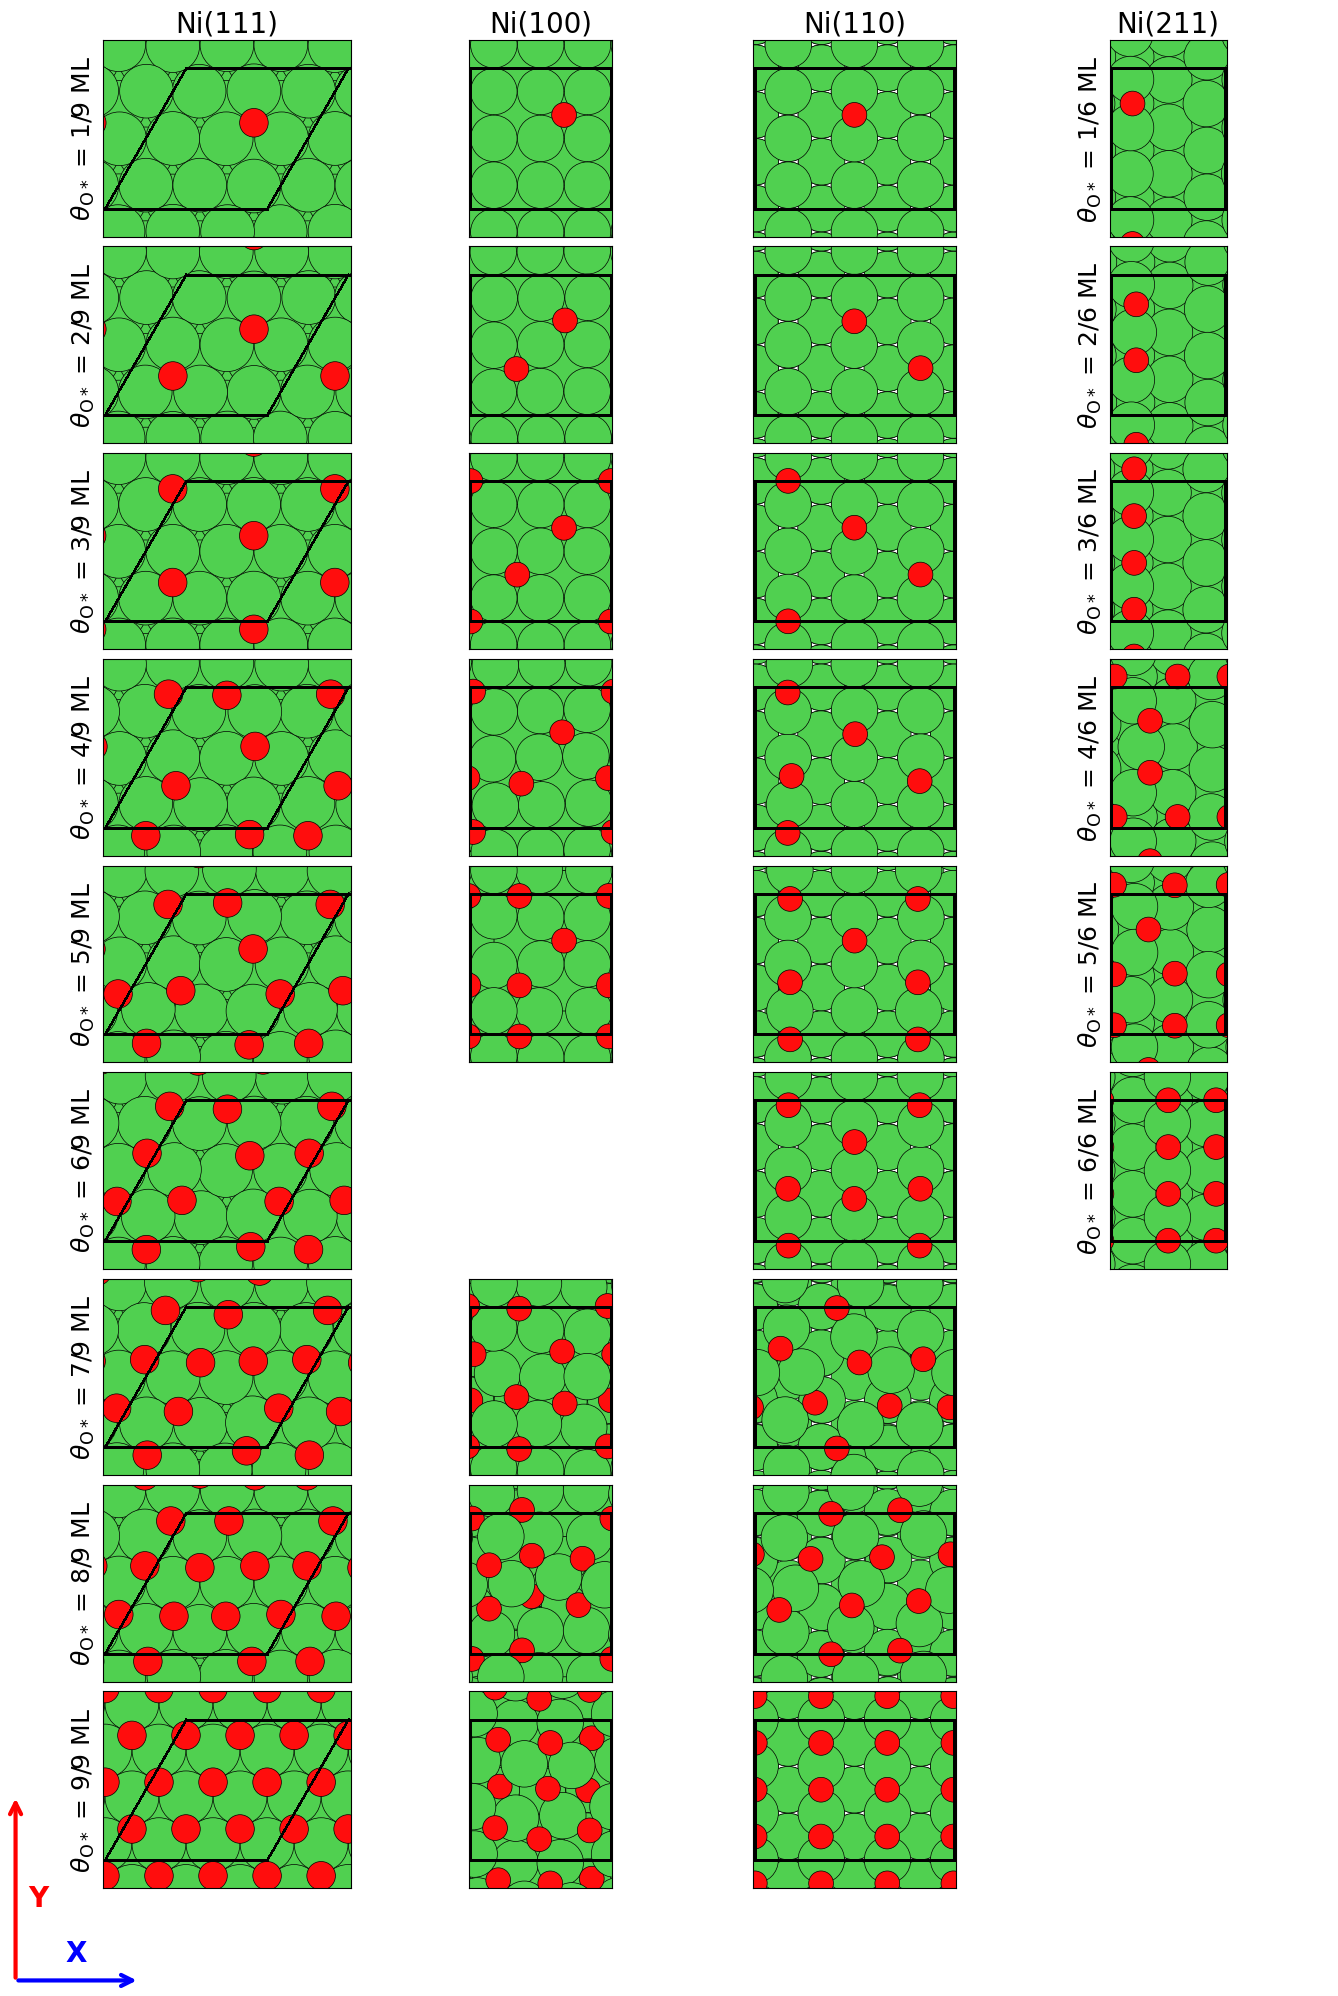

In [25]:
plot_sorted_trajs(all_atoms, img_name="o_test.pdf")